$$
\def\vec#1{\overrightarrow{#1}} 
\def\dint{\displaystyle \int}%
\def\dsum{\displaystyle \sum}%
\def\dsqrt{\displaystyle \sqrt}%
\def\df#1#2{{\dfrac{d #1}{d #2}}}
\def\tens#1{\underline{\underline{#1}}}
\def\vect#1{\left\{\mathbf{#1}\right\}}
\def\mat#1{\left[\mathbf{#1}\right]}
\def\vecd#1#2{\begin{Bmatrix} #1 \\ #2 \end{bmatrix}}
$$

# EF d'Hermitte en Statique Linéaire 

**Formulation et mise en oeuvre d'éléments finis de poutres à interpolations d'Hermitte en flexion et linéaire en tension**

On se réfère ici aux détails donnés dans l'introduction et au Chapitre 6 de https://www.emse.fr/~drapier/index_fichiers/CoursPDF/Meca-Structu2A/SDrapier_Meca-struct-num_2024.pdf

***S. Drapier, Novembre 2024***

## Discrétisation de la formulation en statique linéaire

Pour le *problème statique en HPP*, les problèmes de tension et flexion sont totalement découplés : on superpose les contributions dans le PPV pour former le problème à résoudre. On rappelle que la formulation par élément fini repose sur l'approximation de **Galerkin**, dans laquelle *l'approximation de l'inconnue et de la fonction test sont prises dans la même base de fonctions; la fonction test étant C.A.(0) tandis que la fonction inconnue est C.A. par construction*.

**Remarque générale :** on raisonnera souvent sur la forme intégrale faible limitée spatialement à un seul élément. On notera que cette forme faible n'est pas nulle car chaque élémement est en équilibre *aussi* sous des *conditions de raccord*, *i.e.* l'effet des contributions de ses voisins et potentiellement celui des conditions aux limites appliquées au problème global. Ces conditions seront prises en compte plus tard, après assemblage des contributions élémentaires comme on le pratique dans l'approximation de Galerkin.


### Tension-compression
Pour un seul élément, la forme à discrétiser en tension seul s'écrit assez simplement :
$$\begin{equation}
	\begin{array}{l}
		\delta \mathcal{P}_{int}(\delta u(x)) + \delta \mathcal{P}_{ext}(\delta u(x))
		=0, \ \forall \delta u(x)\:C.A.(0)  \xrightarrow{\text{élémentaire}}
		-\dint_{x_1}^{x_2} {N^h(x)\:\delta u'^h(x) \:dx^h +\dint_{x_1}^{x_2}  p_x(x)\:\delta u^h(x)}\:dx^h 
	\end{array}
\end{equation}$$
En introduisant la discrétisation linéaire (<a href="#eq4">Eq. 1.4</a>) pour le champ recherché et le champ test sous la forme $u^{h,e}(x)=\dsum_{i=1}^2 
N_i(x)u_i=\dsum_{i=1}^2 N_i(x) \ q^e_{i,t}$ et *en considérant des propriétés constantes par élément*, on obtient le système algébrique élémentaire <a name="eq2.1"></a>
$$\begin{equation}
	\begin{array}{l}
	\dsum_{i=1}^2  \left\{  \dsum_{j=1}^2  \dint_{x_1}^{x_2} \left(- E^eS^e\delta q_{i,t}^{e} \dfrac{d{N}_i}{dx} \dfrac{d{N}_j}{dx^2} q_{j,t}^{e} + p_y \: \delta q_{i,t}^{e} \mathcal{N}_i  \right)\:dx^h  \right\} \\[1.5em]
	\Leftrightarrow	\dsum_{i=1}^2  \delta q_{i,t}^{e} \left\{  \dsum_{j=1}^2   \left( -E^{e}S^{e} \dint_{x_1}^{x_2} \dfrac{d{N}_i}{dx} \dfrac{d{N}_j}{dx} \:dx^h \right) q_{j,t}^{e} + p_y^{e}  \dint_{x_1}^{x_2} \mathcal{N}_i  \:dx^h  \right\}\\[1.5em]
	\Leftrightarrow \dsum_{i=1}^2  \dsum_{j=1}^2 \delta q^{e}_i K^{e}_{ij} \; q_j^{e} - \dsum_{i=1}^2 \delta q^{e}_i f_i^{e} 
\end{array}
\end{equation} \tag{2.1}$$
avec la matrice de rigidité symétrique définie positive et le second membre, définis dans le repère local de la poutre
$$\begin{equation}
	\begin{array}{rcl}
		\text{Matrice de rigidit\'{e} élémentaire en tension}\hspace{15pt}
		K_{ij,t}^e&=&E^eS^e \dint_{x_1}^{x_2} \dfrac{dN_j(x)}{dx} \dfrac{dN_i(x)}{dx} \;dx^h \\[+1.5em]
		%&=&\left\{ \begin{array}{rcl} \dfrac{E^eS^e}{l_e} \text{ si }i=j \\[+0.5em] -\dfrac{E^eS^e}{l_e} \text{ si } i\neq
		%	j\end{array}\right.\\[+2em]
		\text{Vecteur des efforts ext\'{e}rieurs répartis selon } \vec x \hspace{15pt}
		f_{i, px}^e&=&p_x \dint_{x_1}^{x_2} \;N_i(x)\;dx^h = p_x \left(\dfrac{l_e}{2}\right)
	\end{array}
\end{equation}$$

On aurait pu directement calculer ces grandeurs élémentaires à partir des approximations des déformations (<a href="#eq7">Eq. 1.7</a>), car $N^h(x) = E^e S^e e_x^h(x)=\mat{\mathcal L_t}  \mat{B_L^e}_t \vect{u^e_t}$. L'expression générale de la raideur et des efforts répartis est donc :
$$\begin{equation} 
\begin{array}{ccc}
	\mat{K^e_t} &=& \dint_e \mat{B_L^e}^T_t  \mat{\mathcal L_t}  \mat{B_L^e}_t  dx^h &&
	\vect{f^e_{px} }&= &\dint_e p_x <N(x^h)>^T  dx^h
\end{array}
\end{equation}$$
avec $\mat{\mathcal L_t}$ la sous-matrice de comportement en membrane, limiteé ici à la seule rigidité $E^eS^e$. Tous calculs faits, ces expressions ont la forme suivante dans le repère local de la poutre :
$$\begin{equation}
		\begin{array}{lr}
		\mat{K^e_t}= \dfrac{E^e S^e}{l_e}\begin{bmatrix}
			1 & -1 \\
			-1 & 1 \end{bmatrix} & \ \ \
		\vect{ f^e_{px}} = p_x\left(\dfrac{l_e}{2} \right)	\begin{Bmatrix}	1  \\  1 \end{Bmatrix}
	\end{array}
\end{equation}$$

### Flexion
La même démarche pour la flexion part de la forme intégrale faible élémentaire
$$-\dint_{x_1}^{x_2} {M^h(x)\:\delta v''^h(x) \:dx^h +\dint_{x_1}^{x_2}  p_y(x)\:\delta v^h(x)}\:dx^h$$
qui est discrétisée avec l'approximation nodale $v^{h,e}(x)=\dsum_{i=1}^4 \mathcal N_i(x)\ q^e_{i,f}$ (<a href="#eq5">Eq. 1.5</a>)
$$\begin{equation}
	\begin{array}{l}
	\dsum_{i=1}^4  \left\{  \dsum_{j=1}^4  \dint_{x_1}^{x_2} \left(- E^eI^e\delta q_{i,f}^{e} \dfrac{d^2\mathcal{N}_i}{dx^2} \dfrac{d^2\mathcal{N}_j}{dx^2} q_{j,t}^{e} + p_y \: \delta q_i^{e} \mathcal{N}_i  \right)\:dx^h  \right\} \\[1.5em]
	\Leftrightarrow	\dsum_{i=1}^4  \delta q_{i,f}^{e} \left\{  \dsum_{j=1}^4   \left( -E^{e}I^{e} \dint_{x_1}^{x_2} \dfrac{d^2\mathcal{N}_i}{dx^2} \dfrac{d^2\mathcal{N}_j}{dx^2}  \:dx^h \right) q_{j,f}^{e} + p_y^{e}  \dint_{x_1}^{x_2} \mathcal{N}_i  \:dx^h  \right\}
\end{array}
\end{equation} \tag{2.2}
$$
ce qu'on met, comme pour la tension, sous la forme générique $ \delta q^{e}_{i,f} \left(K^{e}_{ij} \; q_{j,f}^{e} - f_{i,f}^{e}\right)$, 
$$\begin{equation}
	\begin{array}{rcl}
		\text{Matrice de rigidit\'{e} élémentaire en flexion}\hspace{15pt}
		K_{ij,f}^e&=&E^{e}I^{e} \dint_{x_1}^{x_2} \dfrac{d^2\mathcal{N}_i}{dx^2} \dfrac{d^2\mathcal{N}_j}{dx^2}  \:dx^h \\[+1.5em]
		\text{Vecteur des efforts ext\'{e}rieurs répartis selon } \vec y \hspace{15pt}
		f_{i, py}^e&=&p_y^{e}  \dint_{x_1}^{x_2} \mathcal{N}_i  \:dx^h
	\end{array}
\end{equation}$$
ou encore 
$$\begin{equation} 
\begin{array}{ccc}
	\mat{K^e_f} &=& \dint_e \mat{B_L^e}^T_f  \mat{\mathcal L_f}  \mat{B_L^e}_f  dx^h &&
	\vect{f^e_{py} }&= &\dint_e p_y <N(x^h)>^T  dx^h
\end{array}
\end{equation}$$
Tous calculs faits, ces expressions ont la forme suivante dans le repère local de la poutre :
$$\begin{equation}
	\begin{array}{lr}
		\mat{K^e_f}= \dfrac{EI}{l_e^3}\begin{bmatrix}
			12 & 6l_e & -12 & 6l_e \\
			& 4l_e^2 & -6l_e & 2l_e^2 \\
			&  & 12 & -6l_e \\
			&  &  &  4l_e^2
		\end{bmatrix} & \ \ \
		\vect{ f^e_{py}} =
		\left(\dfrac{p_y\:l_e}{2}\right)
		\begin{Bmatrix}
			1  \\ \dfrac{l_e}{6} \\ 1 \\ -\dfrac{l_e}{6}
		\end{Bmatrix}
	\end{array}
\end{equation} $$

## Rigidité en flexion-tension
Dans le repère local, ces contributions s'assemblent facilement selon les *ddl*s concernés. La matrice de rigidité en tension-flexion s'écrit dans la base locale, comme la somme des contributions des rigidités de flexion et de tension, en posant $\alpha = \dfrac{E^e\ S^e}{l_e}$ et $\beta =  \dfrac{E^e\ I^e}{l_e^3}$:
$$
\mat{K^e}_{(l)} = \left[ 
\begin{array}{cccccc|c}
     u_1 & v_1 & \theta_1 & u_2 & v_2 & \theta_2 &\\[0.2em]
    \hline
    \alpha & 0 & 0 & -\alpha & 0 & 0 & u_1 \\[0.5em]
     & 12 \beta & 6l_e \beta & 0 & -12 \beta & 6l_e \beta & v_1 \\[0.5em]
     &  & 4 l_e^{2} \beta & 0 & -6l_e \beta & 2l_e^2 \beta & \theta_1 \\[0.5em]
     &  &  & \alpha & 0 & 0 & u_2 \\[0.5em]
     & &  &  & 6l_e \beta & -6l_e \beta & v_2 \\[0.5em]
     &  &  & &  & 4l_e^2 \beta & \theta_2 \\[0.5em]
\end{array} \right]
$$
Par contre, il faut que cette rigidité soit exprimée dans le repère de structure. Utilisons le changement de base introduit précédemment (<a href="#eq1.8">Eq. 1.8</a>) : $\vect{q^e}_{(l)}=\mat{R}^T \vect{q^e}_{(g)}$, et reprenons l'origine de la matrice de rigidité qui traduit la discrétisation de la forme bilinéaire symétrique positive représentant l'énergie de déformation de la poutre
$$\begin{equation}
	\begin{array}{rccl}
	\vect{\delta q^e}_{(l)}^T \mat{K^e}_{(l)}\vect{q^e}_{(l)} = &\vect{\delta q^e}_{(g)}^T &\underbrace{\mat{R} \mat{K^e}_{(l)}  \mat{R}^T }&\vect{q^e}_{(g)} \\
	= & \vect{\delta q^e}_{(g)}^T &\mat{K^e}_{(g)} &\vect{q^e}_{(g)}
	\end{array}
\end{equation}$$
ce qui conduit à l'expression finale :
$$
\mat{K^e}_{(g)} = \left[ 
\begin{array}{cccccc|c}
    u_1^1 & u_2^1 & \theta^1 & u_1^2 & u_2^2 & \theta^2 &\\
    \hline \\
    C^{2} \alpha + 12 S^{2} \beta & C S (\alpha - 12 \beta) & -6 S \beta l_e & -C^{2} \alpha - 12 S^{2} \beta & -C S (\alpha - 12 \beta) & -6 S \beta l_e & u_1^1 \\[0.5em]
     & 12 C^{2} \beta + S^{2} \alpha & 6 C \beta l_e & -C S (\alpha - 12 \beta) & -12 C^{2} \beta - S^{2} \alpha & 6 C \beta l_e & u_2^1 \\[0.5em]
     &  & 4 \beta l_e^{2} & 6 S \beta l_e & -6 C \beta l_e & 2 \beta l_e^{2} & \theta^1 \\[0.5em]
     &  &  & C^{2} \alpha + 12 S^{2} \beta & C S (\alpha - 12 \beta) & 6 S \beta l_e & u_1^2 \\[0.5em]
     &  &  &  & 12 C^{2} \beta + S^{2} \alpha & -6 C \beta l_e & u_2^2 \\[0.5em]
     &  &  &  &  & 4 \beta l_e^{2} & \theta^2 \\[0.5em]
\end{array} \right] \tag{2.3}
$$

**Remarque** La projection dans le repère de structure peut aussi être réalisé au cas par cas à partir des des matrices de passage dans leur version numérique. Ici, comme les projections sont assez directes (dans le plan), on préfère utiliser ces formes analytiques.

## Assemblage des contributions élémentaires
Sans entrer dans les détails, les contributions élémentaires vont s'additioner pour former les grandeurs matricelles et vectorielles du système algébrique associé à l'équilibre. Les matrices resteront symétriques et définies positives dans notre cas. Cet __assemblage__ se fait sur la base de la somme des contributions associées aux noeuds de la discrétisation. En effet, la discrétisation permet de ramener le problème continu à une somme de contributions concentrées (efforts, raideurs, masses, amortissements, ...) aux noeuds du maillage.

Par exemple, pour le problème qu'on va devoir résoudre en statique, on repart de la forme intégrale faible discrétisée qui sera construite en sommant, pour chaque noeud $i$ du maillage, les contributions associées calculées pour chaque élément $e$. Pour les efforts, cette somme est assez directe - $F_i = \sum F_i^e$ -, et pour la raideur, on additionnera à chaque position $(i,j)$ les contributions $K^e_{ij}$ de tous les éléments s'appuyant sur ces noeuds $i$ et $j$.
$$
	< \ldots \ \delta q_i \ \ldots \ \ldots >_{(g)} \cdot 
	\left( 
  \left[ \begin{array}{cccc}
	 & & \vdots&  \\[+0.5em]
	\ldots &\ldots& K_{ij} = \dsum_{e=n}^k K^e_{ij}&\ldots\\[+0.5em]
	&&\vdots& \\[+0.5em]
	&&\vdots & \\
\end{array} \right]_{(g)}
\cdot
\begin{Bmatrix} \vdots \\ q_j \\ \vdots \\ \vdots \end{Bmatrix}_{(g)}
=\begin{Bmatrix} \vdots \\ F_i \\ \vdots \\ \vdots \end{Bmatrix}_{(g)}
\right) =0, \ \ \forall \vect{\delta q}^T \ CA^h(0)
$$

L'assemblage s'appuie sur les **connectivités** des éléments, *i.e.* les noeuds qu'ils partagent. Le système linéaire à résoudre correspond en fait à l'équilibre des efforts intérieurs et des efforts extérieurs, c'est en fait le **résidu** noté $\vect{\Psi}$ par exemple. Le vecteur déplacement solution s'obtient (souvent) par *inversion* de la rigidité
$$
\boxed{\vect{\Psi(\vect q^e)}=\mat{K}_{(g)} \cdot \vect{q}_{(g)}- \vect{F}_{(g)} =0 \Rightarrow \vect{q}_{(g)} = \mat{K}^{-1}_{(g)} \cdot \vect{F}_{(g)} } \tag{2.3}
$$

**Remarque :** Ce sytème à inverser est singulier tant que les conditions aux limites de Dirichlet n'ont pas été imposées. Cela correspond physiquement à l'impossibilité de générer des déformations dans les solides tant que les mouvements de corps rigide ne sont pas bloqués. En termes numériques, cela correspond par exemple à un ou des pivots nuls dans le processus de décomposition de Cholesky très souvent utilisé pour inverser la rigidité.

## Généralisation
En introduisant la relation générique entre les déplacements et les déformations (<a href="#eq7">Eq. 1.7</a>), on peut formuler cet équilibre de façon pour tout solide (en HPP).On introduit les efforts conjugés aux déformations, ici les conposantes du second tenseur de Piola-Kirchhoff, qui s'écrivent sous la forme d'un vecteur des contraintes $\vect{\mathcal{S}^e(\vect{\gamma^e})}$ de la même dimension que les déformations de façon à ce que l'énergie de déformation s'écrive $\vect{\mathcal{S}^e(\vect{\gamma^e})}^T \cdot \vect{\gamma^e(\vect{q^e})} $. La forme intégrale faible élémentaire s'écrit alors :
$$  -\dint_{\Omega^{0}_{e}} \vect{\mathcal{S}^e(\vect{\epsilon^e})}^T \mat{B^e_L} \vect{\delta q^e} d\Omega^{0}_e + \vect{\delta q^e}^T\vect{\mathcal F^e} $$
et l'équilibre global s'écrit, après assemblage:
$$ \begin{array}{rclcl}
% -\dint_{\Omega^{0}_{e}} \vect{\mathcal{S}^e(\vect{\gamma^e})}^T \mat{B^e_L} \vect{\delta q^e} d\Omega^{0}_e %\\[+1em]
%+ \vect{\delta q^e}^T\left(  \vect{f(\vec{x})^e} + \vect{F^d(\vec{x})^e} \right) \\
		 & & \vect{\delta q} ^T \left( \dint_{\Omega^0} \mat{B_L}^T \vect{\mathcal{S}(\vect{\epsilon})}d\Omega^0 \right.& - &
	\left.	\vect{\mathcal{F}} \vphantom{\ \dint_{\Omega^0}}  \right)=  0, \ \forall \vect{\delta q}^T \ C.A.(0)  \\[+1em]
	&=& \vect{\delta q}^T \left( \underbrace{\dint_{\Omega^0} \mat{B^e_L}^T  \mat{\mathcal L} \mat{B^e_L} d \Omega^0 } \vect{q} \right. &-& \left.	\vect{\mathcal{F})} \vphantom{\ \dint_{\Omega^0}}  \right) \\[+2.5em]
	\Rightarrow&\vect{\Psi(\vect{q})}  \equiv  &  \hspace{7.5em} \mat{K}_{(g)} \hspace{2em} \cdot \hspace{2em} \vect{q}_{(g)} &-& \vect{\mathcal{F}}_{(g)} =  \vect{0} \ ,  \forall \vect{\delta q}^T \ C.A.(0)
	\end{array} \tag{2.4}$$
    
## Prise en compte des conditions de Neumann et de Dirichlet
**Neumann**
Pour les efforts extérieurs, ils sont de 2 types, les efforts répartis et les efforts ponctuels qui s'appliquent classiquement dans le repère de structure: 
$$
\vect{\mathcal{F}^e}_{(g)} = \vect{f^e_p}_{(g)} + \vect{F^e}_{(g)}
$$
Les efforts répartis sont exprimés dans ce repère en repartant de l'expression de la puissance virtuelle associée 
$$\begin{equation}
	\begin{array}{l}
\vect{\delta q^e}_{(g)}^T\vect{f^e_p}_{(g)} = \vect{\delta q^e}_{(l)}^T \vect{f^e_p}_{(l)}=\left(\mat{R}^T \vect{\delta q^e}_{(g)}\right)^T\vect{f^e_p}_{(l)} = \vect{\delta q^e}_{(g)}^T\mat{R}\vect{f^e_p}_{(l)}  \\[+3em]
 \leadsto  \vect{f^e_p}_{(g)}  = \left(\dfrac{l_e}{2}\right)  \begin{Bmatrix} C \ p_x + S \ p_y\\ -S\ p_x  + C \ p_y\\ p_y \dfrac{l_e}{6} \\ C \ p_x + S \ p_y\\ -S\ p_x  + C \ p_y \\ -p_y \dfrac{l_e}{6} \end{Bmatrix}
\end{array}
\end{equation}$$
Les efforts ponctuels seront appliqués directement aux *ddl*s correspondants, et la contribution des efforts répartis sera d'abord évaluée dans le repère locale, puis projetée explicitement comme indiqué ci-dessus.

**Dirichlet**
Les conditions de Dirichlet homogènes sont prises en compte en mettant à l'unité les contributions diagonales dans les matrices de rigidité et en annulant les autres contributions liées à ce *ddl*:
$$
q_i=0 \Rightarrow \begin{cases} K_{ii}=1 \\ K_{ij}=0 \\ F_i=0\end{cases}
$$
Pour les conditions non-homogènes, il faut procéder par pénalité par exemple - *cf* https://www.emse.fr/~drapier/index_fichiers/CoursPDF/Meca-Structu2A/SDrapier_Meca-struct-num_2024.pdf - Chapitre 6. 

Le système correspondant s'écrit en intégrant les réactions $\vect{R_b}$ qui ne sont habituellement pas présentes dans le système à résoudre. Elles correpondent aux $n_D$ *ddl*s imposés qui notés $\vect{q_b}$. Les $n-n_D$ *ddl*s libres sont notés $\vect{q_l}$ 
$$\begin{equation} 
  \begin{array}{l}
\left[ \begin{array}{c|c}
     \mat{K_{ll}}&\mat{K_{bl}}^{T}\\[+0.5em]
     \hline \\[-0.5em]
      \mat{K_{bl}} & \mat{K_{bb}}
     \\
 \end{array}\right] \cdot
\begin{Bmatrix} \vect{q_l} \\ \vect{q_b} \end{Bmatrix}
 =\begin{Bmatrix} \vect{F_l}  \\ \vect{F_b}+ \vect{R_b} \end{Bmatrix}
\end{array}
\end{equation}$$
$\mat{K_{ll}}$ et $\mat{K_{bb}}$ sont les sous-matrices correspondant aux *ddl*s bloqués et libres respectivement, et des vecteurs d'efforts connus $\left\{F_l\right\}$ et $\left\{F_b\right\}$ y sont associés. Les efforts de réaction $\left\{R_b\right\}$ ne produisent pas de travail dans un champ réel, mais si le champ test ne correspond pas à la variation du champ réel leur contribution n'est pas nulle: $\int_{\partial \Omega_{u}} \tens{\sigma} \cdot \vec{n} \cdot \delta \vec{u} d\Omega \neq 0$ en 3D. La sous-matrice $\mat{K_{bl}}$ relie les contributions croisées des $ddl$s imposés et inconnus. La solution recherchée $\vect{q_l}$ est donc solution de :
$$\mat{K_{ll}}\vect{q_l}= \left\{F_l\right\}-\mat{K_{bl}}^T\vect{q_b}$$
avec $\vect{q_b}=\vect{q^d}$.


On cherche à vérifier $\vect{q_b} = \vect{q^d}$ en imposant une réaction supplémentaire qui traduit la réponse du milieu à cette condition cinématique. Cette réaction s'écrit $\vect{R_b}=\alpha\left(\vect{q_b} - \vect{q^d} \right)$ avec $\alpha$ un scalaire à choisir grand (de l'ordre de $10^{5-8}$, ou plus généralement $\gg max(K_{ij})$). Le travail des efforts de réaction étant nul, la condition sera d'autant mieux vérifiée que $\alpha$ sera grand - $\left(\vect{q_b} - \vect{q^d} \right) \searrow 0$ pour conserver $\vect{R_b}$ du même ordre de grandeur si $\alpha \nearrow$.
$$\begin{equation}
  \begin{array}{l}
\left[ \begin{array}{c|c}
     \mat{K_{ll}}&\mat{K_{bl}}^{T}\\[+0.5em]
     \hline \\[-0.5em]
      \mat{K_{bl}} & \mat{K_{bb}}+\alpha \mat{I}
 \end{array}\right]
\begin{Bmatrix} \vect{q_l} \\ \vect{q_b} \end{Bmatrix}
 =\begin{Bmatrix} \vect{F_l}  \\ \vect{F_b}+ \alpha \vect{q^d} \end{Bmatrix}
\end{array}
\end{equation}$$

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Novembre 2024

@author: S. Drapier

"""

import sys
path = "../source/Python_Files/"
sys.path.append(path)

import numpy as np
import Hermitte_NL_Classes as Cl


# Initialisation de ce qui est de dimension connue
nb_elem = 0
nb_nodes = 0
    
nodes_global = []
fixed_dofs = []
elem_global = []
nodes_elem = []

In [4]:
""" 
    1/ Maillage = 
- définitions des noeuds = construire la liste nodes_global avec des objets noeuds; 
peut être fait à partir d'un fichier texte contenant 3 colonnes : num_noeud, x, y'
- définition des connectivités = donner une liste nodes_elem;
peut être fait à partir d'un fichier texte contenant 3 colonnes : num_elem, noeud1, noeud 2
l'ordre des noeuds définit l'orientation : les charges réparties sont appliquées dans le repère LOCAL

Utilisation d'une fonction pour 1 poutre simple (tests) ou lecture depuis fichiers de définition des noeuds et des connectivités
"""

# A/ maillage d'une poutre test : définition du maillage de 'Nl' éléments orientés d'un angle 'angle'
# Fonction de Maillage d'une poutre droite : Cl.fonct_Maille_Poutre(longueur, Nl, angle)
longueur = 2.
Nl = 13
angle = 0.

""" Création de la liste des noeuds - la position du noeud en partant de 0 est celle qui servira
à stocker les ddls, indépendamment de son numéro """
#nodes_global, nodes_elem = Cl.fonct_Maille_Poutre(longueur, Nl, 0)

# B/ Maillage à partir de 2 fichiers: définition des noeuds (num_node, x, y) et défintion des éléments (num_elem, inode1, inode2) 
nodes_global, nodes_elem = Cl.fonct_Maille_depuis_Fichier(path+'portique_noeuds.txt', path+'portique_elem.txt')
# nodes_global, nodes_elem = Cl.fonct_Maille_depuis_Fichier('poutreH_noeuds.txt', 'poutreH_elem.txt')
nb_elem = len(nodes_elem)

# Les propriétés et chargements répartis des éléments peuvent être précisés dans un np.array
E = 70.E9
rho = 2.6E3
bs = 0.15
hs = 0.3
ES = E * bs * hs
EI = E * bs * hs**3/12
Smasse = rho * bs * hs # masse de la section
meca_elem = np.repeat([[ES, EI,Smasse]],nb_elem,axis=0)

px = 0.  #rho * bs * hs
py = 0.E3
px_py = np.repeat([[px, py]],nb_elem,axis=0)

props_elem = [meca_elem, px_py]

In [5]:
""" 
    2/ Créé un objet "problème éléments finis" à partir d'une liste de noeuds et des propriétés Meca_elem et efforts linéiques px_py
"""
pb = Cl.pbEF_poutre(nodes_global, nodes_elem, props_elem)

# Créé le maillage correspondant aux connectivités et assemble les grandeurs (K_global, M_global, F_rep)
pb.Maillage_Assemblage()

""" 
    3/ Conditions aux limites
"""
total_dofs = pb.total_dofs

CL_forces = [[11,1,-5E3]]#[,1,-1/np.sqrt(2)],[11,2,-1./np.sqrt(2)]]#,[3,1,2E3]]
CL_deplacements = [[1,1,0],[1,2,0],[1,3,0],[11,3,0]]

pb.Application_CL(CL_forces, CL_deplacements)


K_global, Kgeom_global, M_global = pb.K_global, pb.Kgeom_global, pb.M_global
F_con, F_rep, F_tot = pb.F_con, pb.F_rep, pb.F_tot

<Axes: >

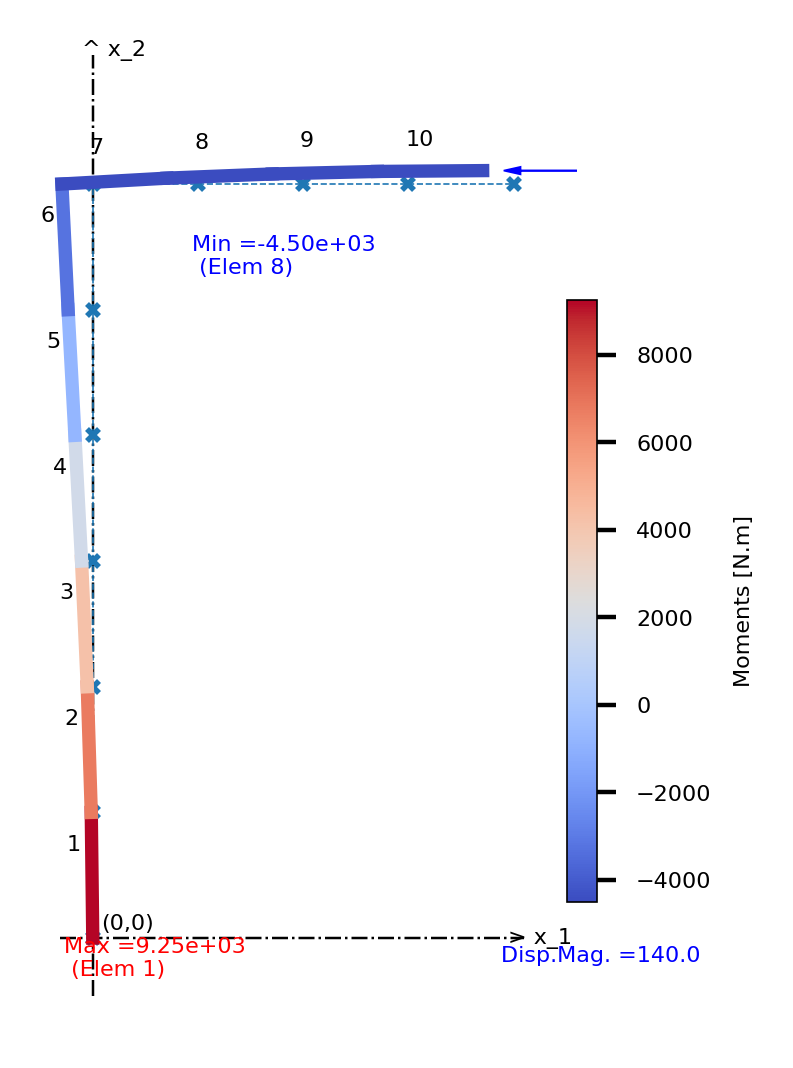

In [8]:
"""
    4/ Résolution 
"""    
dofs = pb.Resol()
# Mise à jour des champs cinématiques et statiques
elem_global = pb.Calcul_Def_Eff()

""" 
    5/ Affichage - si pas de colormap donnée (coolwarm, bwr, seismic, ...), pas d'affichage de la colorbar
""" 
pb.Affichage('M', 'coolwarm', vp = 5)


In [7]:
print(nodes_global[10])

Noeud 11, x1 = 2.000000, x2 = 3.000000, 
 u = -0.001051, v = 0.000381, 
 u1 = -0.001051, u2 = 0.000381, 
 theta = 0.0 
 position = 10
